In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df= df[df['job_title_short']== 'Data Analyst']

In [15]:
df_exploded= df.explode('job_skills')

skills_stats=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg', 'median')
)

skills_stats=skills_stats.sort_values(by='skill_count', ascending=False).head(10)

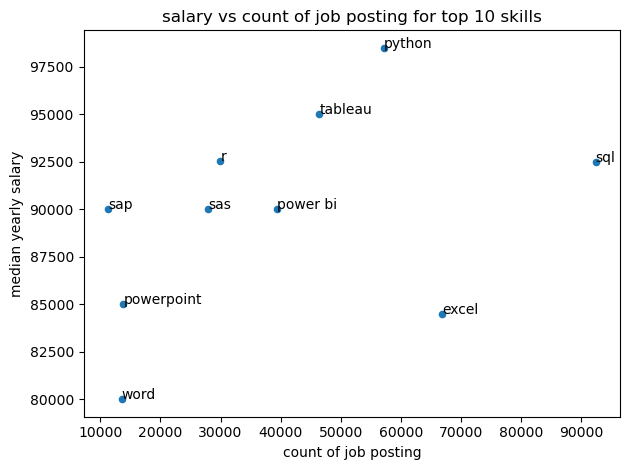

In [18]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count of job posting for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
    
plt.show()